8. Examine the Relationship between Two Variables in the Iris Dataset and perform 
Regression Analysis to model the relationship between the two variables


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


In [3]:
# Select two variables for analysis
x = df['sepal length (cm)'].values.reshape(-1, 1)  # Predictor variable (reshape for sklearn)
y = df['petal length (cm)'].values  # Response variable


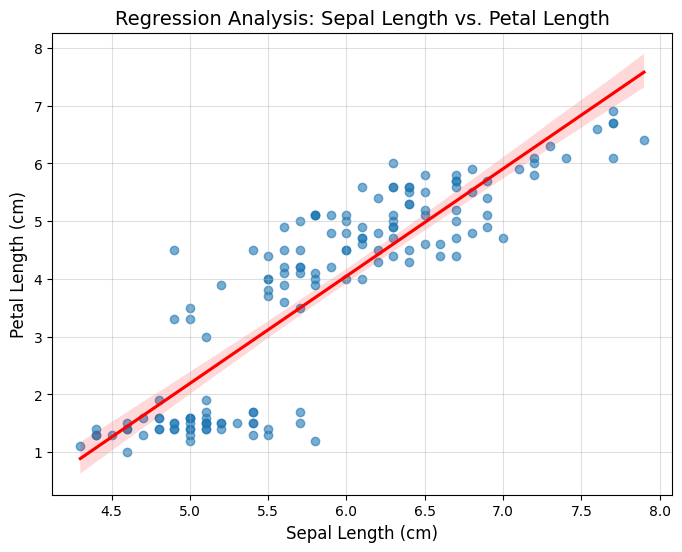

In [4]:
# 1. Scatterplot with Regression Line
# ---------------------------------
plt.figure(figsize=(8, 6))
sns.regplot(x=x.flatten(), y=y, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Regression Analysis: Sepal Length vs. Petal Length', fontsize=14)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)
plt.grid(alpha=0.4)
plt.show()

In [5]:
# 2. Perform Regression Analysis
# ---------------------------------
# Initialize and fit the model
reg_model = LinearRegression()
reg_model.fit(x, y)

LinearRegression()

In [6]:
# Get regression coefficients
slope = reg_model.coef_[0]
intercept = reg_model.intercept_

In [7]:
# Generate predictions
y_pred = reg_model.predict(x)

In [8]:
# Print regression equation and R^2 score
print(f"Regression Equation: y = {slope:.2f} * x + {intercept:.2f}")
print(f"R-squared Value: {reg_model.score(x, y):.2f}")


Regression Equation: y = 1.86 * x + -7.10
R-squared Value: 0.76


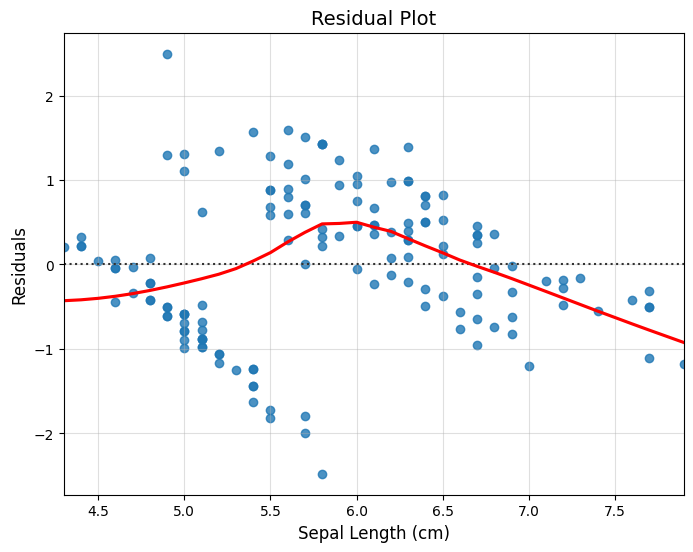

In [9]:
# 3. Visualize Residuals
# ---------------------------------
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=x.flatten(), y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot', fontsize=14)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(alpha=0.4)
plt.show()